## 3. Seja o R³, espaço tridimensional afim e nele, deseja-se animar com operadores afins um pião, com o bico inicialmente em (1,2,0), de modo que ele gire em torno do eixo 𝑟 = {(𝑥, 𝑦, 𝑧) ∈ 𝑅³|𝑥 = 1 + 𝑞, 2 − 𝑞, 0}, dando 4 voltas em torno de r a cada t segundos. E enquanto o pião gira em torno r, r gira em torno de 𝑠 = {(𝑥, 𝑦, 𝑧) ∈ 𝑅³|𝑥 = 2 𝑒 𝑦 = 1}, dando uma volta a cada t segundos. Considere um valor apropriado de t

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Tempo total
t = 8  # segundos

print("PROBLEMA 1: Setup do Pião")
print("="*50)

# Eixo r: passa por (1,2,0) na direção (1,-1,0)
ponto_r = np.array([1, 2, 0])
direcao_r = np.array([1, -1, 0])

print("\nEixo r:")
print(f"  Passa por: {ponto_r}")
print(f"  Direção: {direcao_r}")
print(f"  Rotação: 4 voltas a cada {t} segundos")

# Eixo s: x=2, y=1, z variável (eixo vertical)
ponto_s = np.array([2, 1, 0])
direcao_s = np.array([0, 0, 1])

print("\nEixo s:")
print(f"  Passa por: {ponto_s}")
print(f"  Direção: {direcao_s}")
print(f"  Rotação: 1 volta a cada {t} segundos")

# Desenhar os eixos
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Desenhar eixo r
q_vals = np.linspace(-2, 4, 100)
eixo_r_x = ponto_r[0] + direcao_r[0] * q_vals
eixo_r_y = ponto_r[1] + direcao_r[1] * q_vals
eixo_r_z = ponto_r[2] + direcao_r[2] * q_vals
ax.plot(eixo_r_x, eixo_r_y, eixo_r_z, 'g-', linewidth=2, label='Eixo r')

# Desenhar eixo s
q_vals = np.linspace(-2, 3, 100)
eixo_s_x = ponto_s[0] + direcao_s[0] * q_vals
eixo_s_y = ponto_s[1] + direcao_s[1] * q_vals
eixo_s_z = ponto_s[2] + direcao_s[2] * q_vals
ax.plot(eixo_s_x, eixo_s_y, eixo_s_z, 'r-', linewidth=2, label='Eixo s')

# Marcar pontos importantes
ax.scatter(*ponto_r, color='green', s=100, label='Ponto r (1,2,0)')
ax.scatter(*ponto_s, color='red', s=100, label='Ponto s (2,1,0)')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.set_title('Eixos de Rotação')
plt.show()

PROBLEMA 1: Setup do Pião

Eixo r:
  Passa por: [1 2 0]
  Direção: [ 1 -1  0]
  Rotação: 4 voltas a cada 8 segundos

Eixo s:
  Passa por: [2 1 0]
  Direção: [0 0 1]
  Rotação: 1 volta a cada 8 segundos


<IPython.core.display.Javascript object>

## Exiba as matrizes de operadores afins parametrizados em função do tempo.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# FUNÇÕES

t = 8  # tempo total

# Eixos
ponto_r = np.array([1, 2, 0])
direcao_r = np.array([1, -1, 0])
ponto_s = np.array([2, 1, 0])
direcao_s = np.array([0, 0, 1])

def rotacao_eixo(eixo, angulo):
    """Rotação em torno de um eixo"""
    eixo = eixo / np.linalg.norm(eixo)
    x, y, z = eixo
    c = np.cos(angulo)
    s = np.sin(angulo)
    
    R = np.array([
        [c + x*x*(1-c),     x*y*(1-c) - z*s,  x*z*(1-c) + y*s],
        [y*x*(1-c) + z*s,   c + y*y*(1-c),    y*z*(1-c) - x*s],
        [z*x*(1-c) - y*s,   z*y*(1-c) + x*s,  c + z*z*(1-c)]
    ])
    return R

def criar_operador_afim(R, translacao):
    """Matriz 4x4 para operador afim"""
    M = np.eye(4)
    M[:3, :3] = R
    M[:3, 3] = translacao
    return M

def calcular_T1(tempo):
    """T1: Pião gira em torno de r (4 voltas)"""
    angulo = 4 * 2 * np.pi * tempo / t
    R = rotacao_eixo(direcao_r, angulo)
    trans = ponto_r - R @ ponto_r
    return criar_operador_afim(R, trans), angulo

def calcular_T2(tempo):
    """T2: Eixo r gira em torno de s (1 volta)"""
    angulo = 2 * np.pi * tempo / t
    R = rotacao_eixo(direcao_s, angulo)
    trans = ponto_s - R @ ponto_s
    return criar_operador_afim(R, trans), angulo

# EXIBIR MATRIZES EM DIFERENTES TEMPOS

print("PROBLEMA 2: MATRIZES DOS OPERADORES AFINS")
print("="*40)
print(f"\nTempo total: {t} segundos")
print("\nFórmula geral:")
print("  M(t) = T2(t) @ T1(t)")
print("\nOnde:")
print("  T1(t) = Rotação em torno do eixo r (4 voltas)")
print("  T2(t) = Rotação em torno do eixo s (1 volta)")
print("\n" + "="*40)

# Calcular matrizes em vários tempos
tempos = [0, 1, 2, 3, 4, 5, 6, 7, 8]

for tempo in tempos:
    print(f"\n{'='*60}")
    print(f"TEMPO t = {tempo} segundos ({tempo/t*100:.0f}% do ciclo)")
    print('='*60)
    
    # Calcular T1 e T2
    T1, angulo1 = calcular_T1(tempo)
    T2, angulo2 = calcular_T2(tempo)
    
    # Matriz final
    M_final = T2 @ T1
    
    print(f"\nÂngulo em r: {angulo1:.4f} rad = {np.degrees(angulo1):.1f}°")
    print(f"Ângulo em s: {angulo2:.4f} rad = {np.degrees(angulo2):.1f}°")
    
    print("\nMatriz T1 (4x4):")
    print(T1)
    
    print("\nMatriz T2 (4x4):")
    print(T2)
    
    print("\nMatriz FINAL M = T2 @ T1 (4x4):")
    print(M_final)
    
    # Mostrar forma explícita
    print("\nForma explícita da matriz final:")
    print("┌                                        ┐")
    for i in range(4):
        linha = "│ "
        for j in range(4):
            linha += f"{M_final[i,j]:8.4f} "
        linha += "│"
        print(linha)
    print("└                                        ┘")

# VISUALIZAR COMO AS MATRIZES MUDAM NO TEMPO

print("\n" + "="*40)
print("GRÁFICO: Como os elementos da matriz mudam com o tempo")
print("="*40)

# Calcular elementos da matriz ao longo do tempo
tempos_continuos = np.linspace(0, t, 100)
elementos = {
    'M[0,0]': [],
    'M[0,3]': [],  # translação em x
    'M[1,3]': [],  # translação em y
    'M[2,3]': []   # translação em z
}

for tempo in tempos_continuos:
    T1, _ = calcular_T1(tempo)
    T2, _ = calcular_T2(tempo)
    M = T2 @ T1
    
    elementos['M[0,0]'].append(M[0, 0])
    elementos['M[0,3]'].append(M[0, 3])
    elementos['M[1,3]'].append(M[1, 3])
    elementos['M[2,3]'].append(M[2, 3])

# Plotar
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

ax1 = axes[0, 0]
ax1.plot(tempos_continuos, elementos['M[0,0]'], 'b-', linewidth=2)
ax1.set_title('Elemento M[0,0] (rotação)')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Valor')
ax1.grid(True, alpha=0.3)

ax2 = axes[0, 1]
ax2.plot(tempos_continuos, elementos['M[0,3]'], 'r-', linewidth=2)
ax2.set_title('Elemento M[0,3] (translação X)')
ax2.set_xlabel('Tempo (s)')
ax2.set_ylabel('Valor')
ax2.grid(True, alpha=0.3)

ax3 = axes[1, 0]
ax3.plot(tempos_continuos, elementos['M[1,3]'], 'g-', linewidth=2)
ax3.set_title('Elemento M[1,3] (translação Y)')
ax3.set_xlabel('Tempo (s)')
ax3.set_ylabel('Valor')
ax3.grid(True, alpha=0.3)

ax4 = axes[1, 1]
ax4.plot(tempos_continuos, elementos['M[2,3]'], 'm-', linewidth=2)
ax4.set_title('Elemento M[2,3] (translação Z)')
ax4.set_xlabel('Tempo (s)')
ax4.set_ylabel('Valor')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

PROBLEMA 2: MATRIZES DOS OPERADORES AFINS

Tempo total: 8 segundos

Fórmula geral:
  M(t) = T2(t) @ T1(t)

Onde:
  T1(t) = Rotação em torno do eixo r (4 voltas)
  T2(t) = Rotação em torno do eixo s (1 volta)


TEMPO t = 0 segundos (0% do ciclo)

Ângulo em r: 0.0000 rad = 0.0°
Ângulo em s: 0.0000 rad = 0.0°

Matriz T1 (4x4):
[[ 1. -0.  0.  0.]
 [ 0.  1. -0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]

Matriz T2 (4x4):
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Matriz FINAL M = T2 @ T1 (4x4):
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Forma explícita da matriz final:
┌                                        ┐
│   1.0000   0.0000   0.0000   0.0000 │
│   0.0000   1.0000   0.0000   0.0000 │
│   0.0000   0.0000   1.0000   0.0000 │
│   0.0000   0.0000   0.0000   1.0000 │
└                                        ┘

TEMPO t = 1 segundos (12% do ciclo)

Ângulo em r: 3.1416 rad = 180.0°
Ângulo em s: 0.7854 rad = 45.0°

Matriz T1 (4x4):
[[-2.22044605e-16 -1.00

<IPython.core.display.Javascript object>

## E simule um pião executando as operações definidas. De preferência, marcar um ponto na frente do pião pra acompanhar a rotação torna a tarefa mais fácil

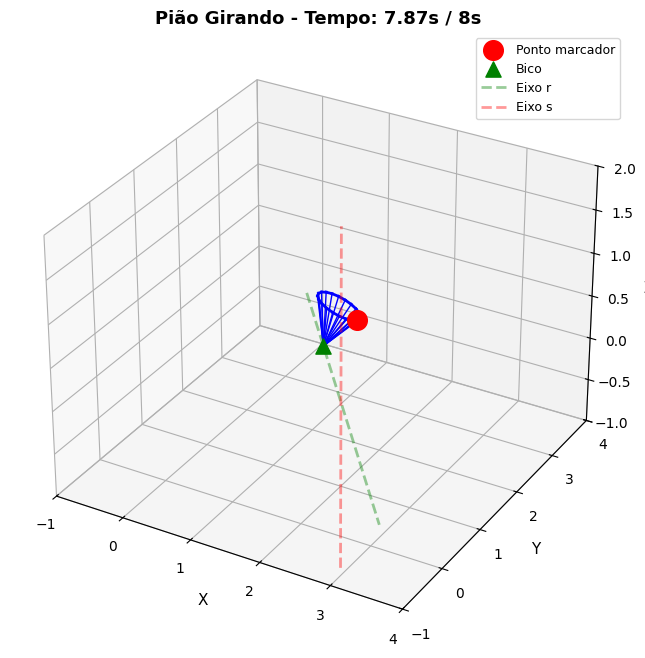

Animação completa!


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# FUNÇÕES

t = 8  # tempo total

ponto_r = np.array([1, 2, 0])
direcao_r = np.array([1, -1, 0])
ponto_s = np.array([2, 1, 0])
direcao_s = np.array([0, 0, 1])

def rotacao_eixo(eixo, angulo):
    eixo = eixo / np.linalg.norm(eixo)
    x, y, z = eixo
    c = np.cos(angulo)
    s = np.sin(angulo)
    
    R = np.array([
        [c + x*x*(1-c),     x*y*(1-c) - z*s,  x*z*(1-c) + y*s],
        [y*x*(1-c) + z*s,   c + y*y*(1-c),    y*z*(1-c) - x*s],
        [z*x*(1-c) - y*s,   z*y*(1-c) + x*s,  c + z*z*(1-c)]
    ])
    return R

def criar_operador_afim(R, translacao):
    M = np.eye(4)
    M[:3, :3] = R
    M[:3, 3] = translacao
    return M

def calcular_T1(tempo):
    angulo = 4 * 2 * np.pi * tempo / t
    R = rotacao_eixo(direcao_r, angulo)
    trans = ponto_r - R @ ponto_r
    return criar_operador_afim(R, trans)

def calcular_T2(tempo):
    angulo = 2 * np.pi * tempo / t
    R = rotacao_eixo(direcao_s, angulo)
    trans = ponto_s - R @ ponto_s
    return criar_operador_afim(R, trans)

def criar_piao():
    pontos = []
    pontos.append([0, 0, 0])  # bico
    
    raio = 0.3
    altura = 0.5
    for i in range(20):
        angulo = 2 * np.pi * i / 20
        x = raio * np.cos(angulo)
        y = raio * np.sin(angulo)
        z = altura
        pontos.append([x, y, z])
    
    pontos.append([raio, 0, altura])  # marcador vermelho
    return np.array(pontos)

def aplicar_transformacao(M, pontos):
    n = len(pontos)
    pontos_hom = np.column_stack([pontos, np.ones(n)])
    pontos_transformados = (M @ pontos_hom.T).T
    return pontos_transformados[:, :3]

def desenhar_piao(ax, piao, tempo):
    """Desenha o pião no eixo fornecido"""
    ax.clear()
    
    # Linhas do bico para a base
    for i in range(1, 21):
        ax.plot([piao[0, 0], piao[i, 0]],
                [piao[0, 1], piao[i, 1]],
                [piao[0, 2], piao[i, 2]], 'b-', linewidth=1)
    
    # Base circular
    for i in range(1, 21):
        j = i + 1 if i < 20 else 1
        ax.plot([piao[i, 0], piao[j, 0]],
                [piao[i, 1], piao[j, 1]],
                [piao[i, 2], piao[j, 2]], 'b-', linewidth=2)
    
    # PONTO VERMELHO (marcador)
    ax.scatter(piao[-1, 0], piao[-1, 1], piao[-1, 2], 
               c='red', s=200, marker='o', label='Ponto marcador')
    
    # Bico (verde)
    ax.scatter(piao[0, 0], piao[0, 1], piao[0, 2], 
               c='green', s=120, marker='^', label='Bico')
    
    # Eixo r (gira com o tempo)
    T2 = calcular_T2(tempo)
    q = np.linspace(-1, 3, 25)
    eixo_r_base = ponto_r[:, np.newaxis] + direcao_r[:, np.newaxis] * q
    eixo_r_hom = np.vstack([eixo_r_base, np.ones((1, 25))])
    eixo_r_trans = (T2 @ eixo_r_hom)[:3, :]
    ax.plot(eixo_r_trans[0, :], eixo_r_trans[1, :], eixo_r_trans[2, :], 
            'g--', alpha=0.4, linewidth=2, label='Eixo r')
    
    # Eixo s (fixo)
    z_vals = np.linspace(-2, 2, 25)
    ax.plot([2]*25, [1]*25, z_vals, 'r--', alpha=0.4, linewidth=2, label='Eixo s')
    
    # Configurações
    ax.set_xlabel('X', fontsize=11)
    ax.set_ylabel('Y', fontsize=11)
    ax.set_zlabel('Z', fontsize=11)
    ax.set_xlim([-1, 4])
    ax.set_ylim([-1, 4])
    ax.set_zlim([-1, 2])
    ax.legend(fontsize=9)
    ax.set_title(f'Pião Girando - Tempo: {tempo:.2f}s / {t}s', 
                 fontsize=13, fontweight='bold')

# CRIAR PIÃO INICIAL

piao_base = criar_piao()
M_inicial = np.eye(4)
M_inicial[:3, 3] = [1, 2, 0]
piao_inicial = aplicar_transformacao(M_inicial, piao_base)

# ANIMAÇÃO COM LOOP 

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

num_frames = 60  # 60 frames
for frame in range(num_frames):
    tempo = (frame / num_frames) * t
    
    # Calcular posição do pião
    T1 = calcular_T1(tempo)
    T2 = calcular_T2(tempo)
    M = T2 @ T1
    piao = aplicar_transformacao(M, piao_inicial)
    
    # Desenhar
    desenhar_piao(ax, piao, tempo)
    
    # Atualizar display
    clear_output(wait=True)
    display(fig)
    time.sleep(0.1)  # 0.1 segundos entre frames
    
plt.close()
print("Animação completa!")